# **DBSCAN Clustering**

**1. minPts:** The minimum number of points (a threshold) clustered together for a region to be considered dense.

**2. eps (ε):** A distance measure that will be used to locate the points in the neighborhood of any point.


**Core Point:** A point is a core point if it has more than MinPts points within eps. 

**Border Point:** A point which has fewer than MinPts within eps but it is in the neighborhood of a core point. 

**Noise or outlier:** A point which is not a core point or border point.

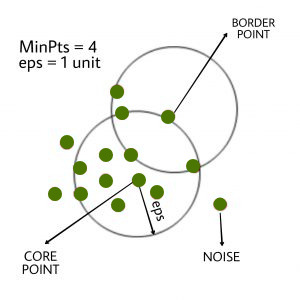

### 1. Directly Density-Reachable
### 2. Density-Reachable
### 3. Density-Connected

**1. Direct density reachable:** A point is called direct density reachable if it has a core point in its neighbourhood. Consider the point (1, 2), it has a core point (1.2, 2.5) in its neighbourhood, hence, it will be a direct density reachable point.

**2. Density Reachable:** A point is called density reachable from another point if they are connected through a series of core points. For example, consider the points (1, 3) and (1.5, 2.5), since they are connected through a core point (1.2, 2.5), they are called density reachable from each other.

**3. Density Connected:** Two points are called density connected if there is a core point which is density reachable from both the points.



![image.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db10.png)![image2.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db11.png)![image3.png](https://cdn.analyticsvidhya.com/wp-content/uploads/2020/03/db12.png)

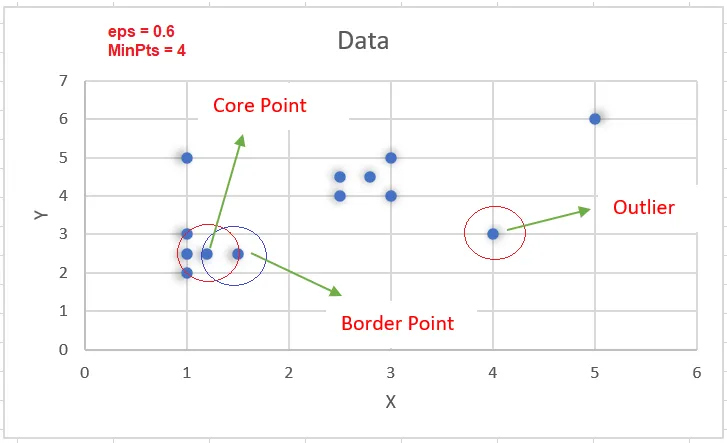

## **Algorithm Steps:**

1. Choose a value for **eps** and **MinPts**
2. For a particular data point (x) calculate its distance from every other datapoint.
3. Find all the neighbourhood points of x which fall inside the circle of radius (eps) or simply whose distance from x is smaller than or equal to eps.
4. Treat x as visited and if the number of neighbourhood points around x are greater or equal to MinPts then treat x as a **core point** and if it is not assigned to any cluster, create a new cluster and assign it to that.
5. If the number of neighbourhood points around x are **less than MinPts** and it **has a core point in its neighbourhood**, treat it as a **border point**.
6. Include all the density connected points as a single cluster. (What density connected points mean is described later)
7. Repeat the above steps for every unvisited point in the data set and find out all core, border and outlier points.

### Example

**step 1:**

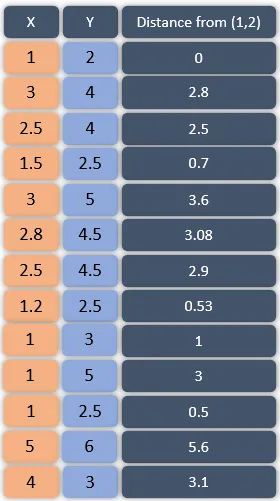

**step 2:**

![image.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*7QcFrSyOnmZsd-Ut.png)

**step 3:**

**observe that the core points (1.2, 2.5) and (1, 2.5) share at least one common neighbourhood point (1,2) so, they are assigned to the same cluster.**

![image.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*oYleoU9KoClPFlGw.png)

**step 4:**

![image.png](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*lrkM2zUvMXfakMfj.png)

In [18]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [13]:

np.random.seed(42)

# Function for creating datapoints in the form of a circle
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-30,30),math.sin(2*math.pi/n*x)*r+np.random.normal(-30,30)) for x in range(1,n+1)]

In [14]:
# Creating data points in the form of a circle
df=pd.DataFrame(PointsInCircum(500,1000))
df=df._append(PointsInCircum(300,700))
df=df._append(PointsInCircum(100,300))

# Adding noise to the dataset
df=df._append([(np.random.randint(-600,600),np.random.randint(-600,600)) for i in range(300)])

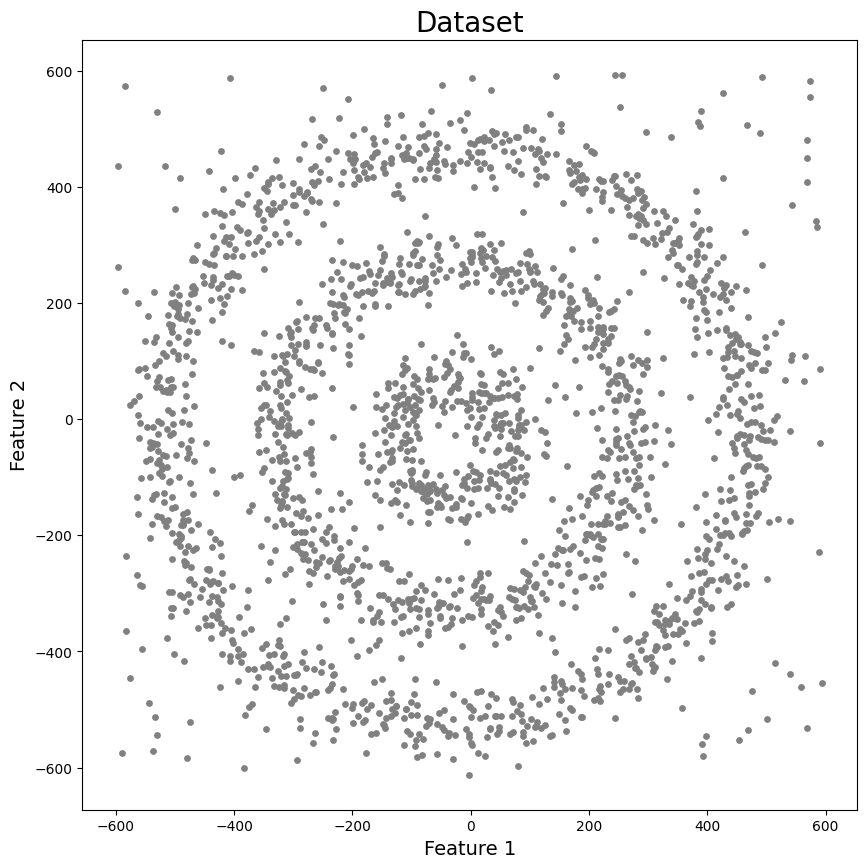

In [15]:
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],s=15,color='grey')
plt.title('Dataset',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

In [16]:
df

,0,1
0,484.891555,-31.006357
1,489.391178,21.973916
2,462.886575,-27.599889
3,517.218479,5.588090
4,455.669049,1.982181
...,...,...
295,-229.000000,-504.000000
296,392.000000,-580.000000
297,134.000000,525.000000
298,469.000000,-535.000000


```
class sklearn.cluster.KMeans(n_clusters=8, *, 
                            init='k-means++', 
                            n_init='auto', 
                            max_iter=300, 
                            tol=0.0001, 
                            verbose=0, 
                            random_state=None, 
                            copy_x=True, 
                            algorithm='lloyd')
```

In [17]:
from sklearn.cluster import KMeans
k_means=KMeans(n_clusters=4,random_state=42)
k_means.fit(df[[0,1]])

c:\Users\sushovan.saha\AppData\Local\miniconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

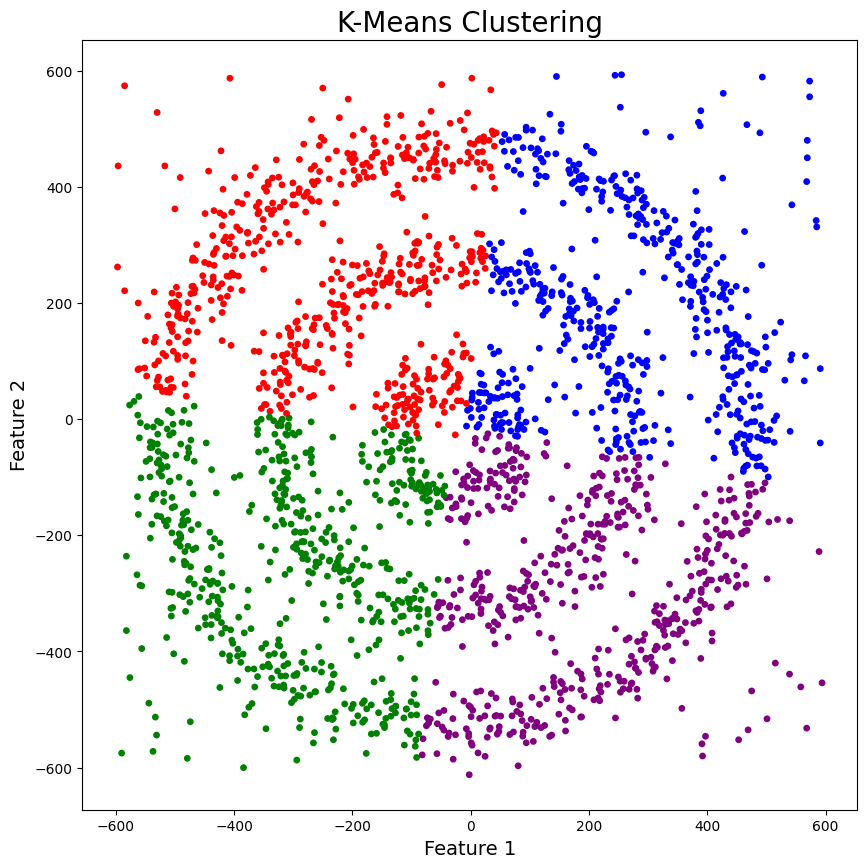

In [19]:
df['KMeans_labels']=k_means.labels_

# Plotting resulting clusters
colors=['purple','red','blue','green']
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

```
class sklearn.cluster.AgglomerativeClustering(n_clusters=2, *, 
                                              metric='euclidean', 
                                              memory=None, 
                                              connectivity=None, 
                                              compute_full_tree='auto', 
                                              linkage='ward', 
                                              distance_threshold=None, 
                                              compute_distances=False)
```

In [21]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=4, metric='euclidean')
model.fit(df[[0,1]])

AgglomerativeClustering(n_clusters=4)

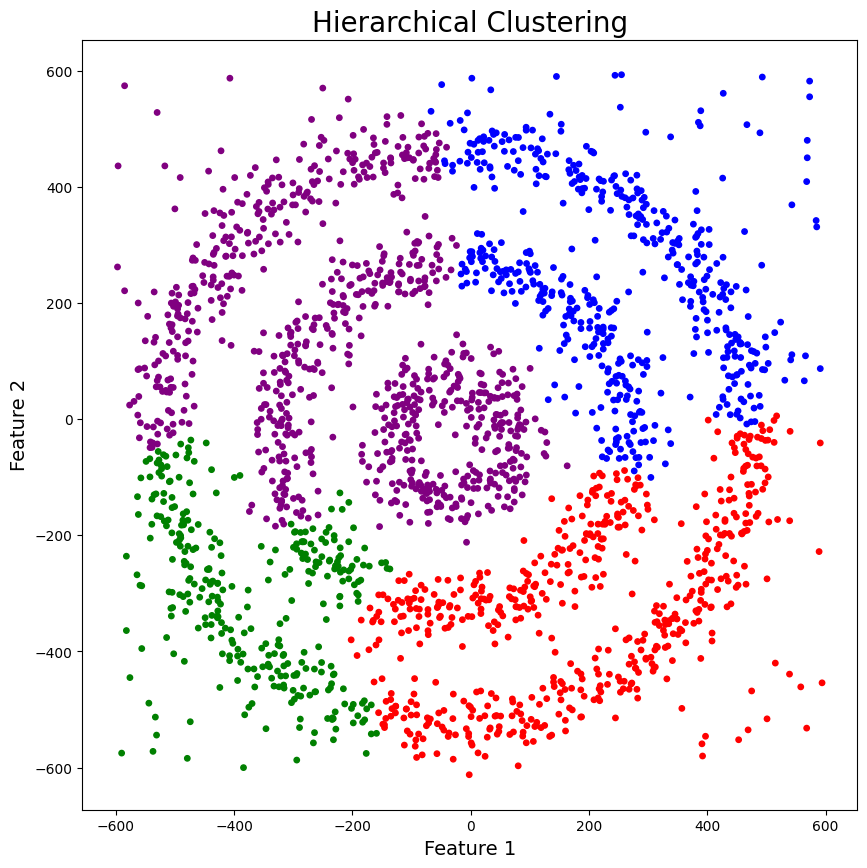

In [22]:
df['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

```
class sklearn.cluster.DBSCAN(eps=0.5,
                             min_samples=5, 
                             metric='euclidean',
                             metric_params=None, 
                             algorithm='auto', 
                             leaf_size=30, 
                             p=None, 
                             n_jobs=None)
```

In [23]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(df[[0,1]])

DBSCAN()

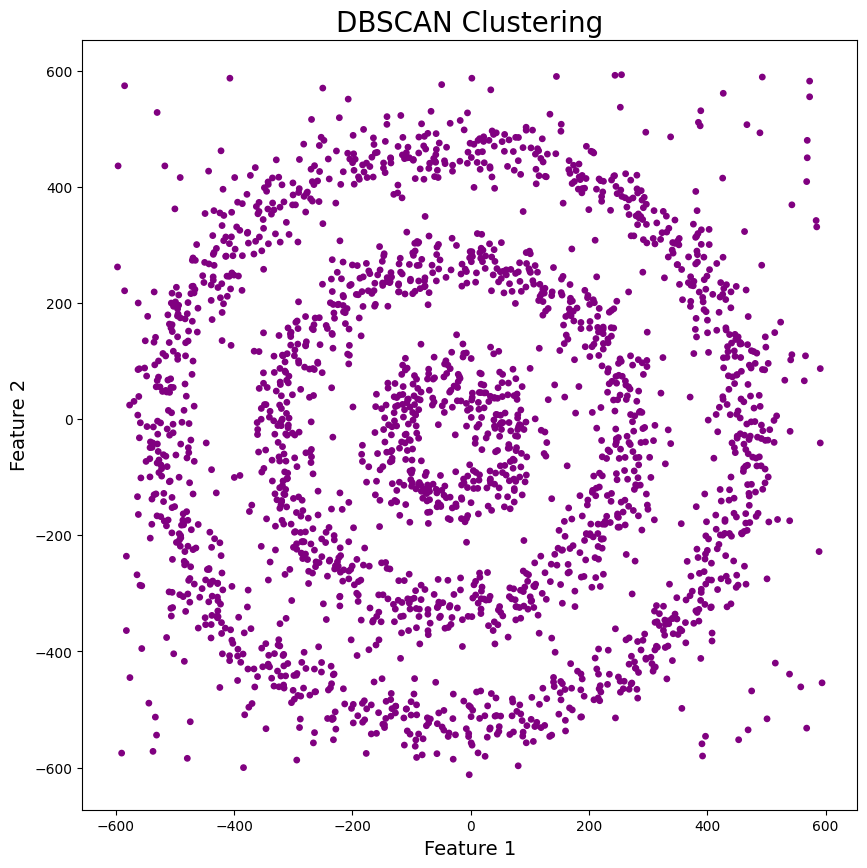

In [24]:
df['DBSCAN_labels']=dbscan.labels_
plt.figure(figsize=(10,10)) 
plt.scatter(df[0],df[1],c=df['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15) 
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

**Interesting! All the data points are now of purple color which means they are treated as noise. It is because the value of epsilon is very small and we didn’t optimize parameters. Therefore, we need to find the value of epsilon and minPoints and then train our model again.**

**For epsilon :**  using the **K-distance graph**. For plotting a K-distance Graph, we need the distance between a point.

**minPts :** its nearest data point for all data points in the dataset. We obtain this using **NearestNeighbors** from sklearn.neighbors.

In [41]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2) # k = 2 -> 2-distance graph
nbrs = neigh.fit(df[[0,1]])
distances, indices = nbrs.kneighbors(df[[0,1]])

In [42]:
distances

array([[ 0.        ,  6.91861074],
       [ 0.        , 10.80836526],
       [ 0.        ,  7.56030267],
       ...,
       [ 0.        , 25.77071121],
       [ 0.        , 23.34523506],
       [ 0.        , 37.73592453]])

In [43]:
indices

array([[   0,  993],
       [   1, 2237],
       [   2,    5],
       ...,
       [2297,  210],
       [2298, 2139],
       [2299, 2059]], dtype=int64)

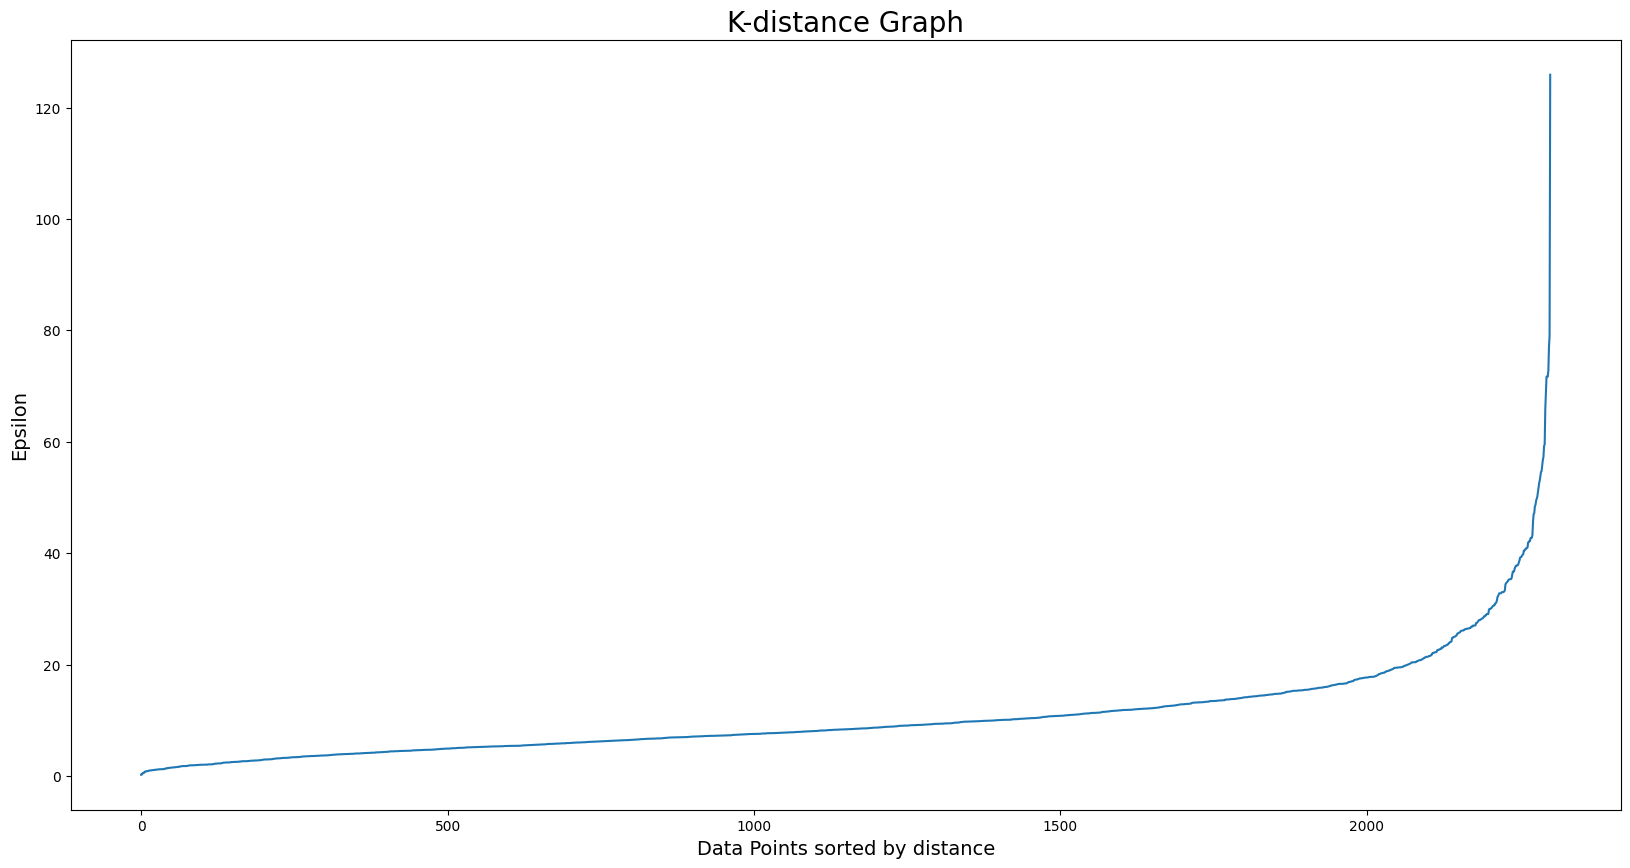

In [26]:
# Plotting K-distance Graph
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(20,10))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=20)
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### **The optimum value of epsilon is at the point of maximum curvature in the K-Distance Graph, which is 30 in this case.**

### **minPoints :** The value of minPoints also depends on domain knowledge. This time I am taking minPoints as 6:

In [33]:
from sklearn.cluster import DBSCAN
dbscan_opt=DBSCAN(eps=30,min_samples=6)
dbscan_opt.fit(df[[0,1]])

DBSCAN(eps=30, min_samples=6)

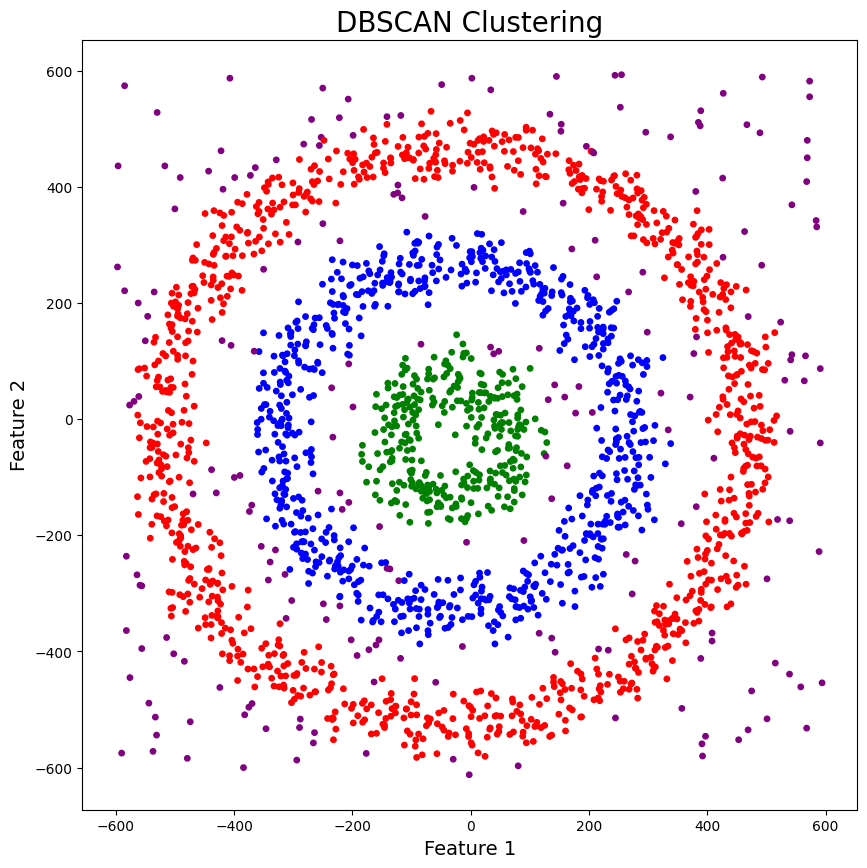

In [34]:
df['DBSCAN_opt_labels']=dbscan_opt.labels_
plt.figure(figsize=(10,10))
plt.scatter(df[0],df[1],c=df['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()